# **NetworkX :**

In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=46b2b705bd3dc0deab05740762f1617878cdce7eaff6ecacb2df0e73f5068173
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


False
True
2
[0, 2]


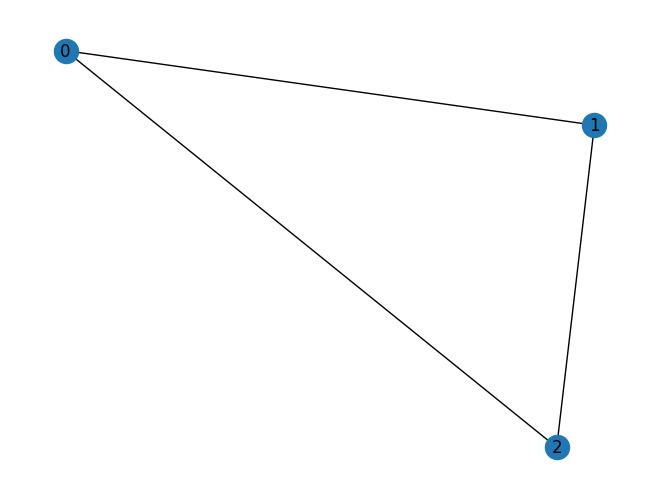

In [2]:
import networkx as nx

G = nx.Graph()
print(G.is_directed())

H = nx.DiGraph()
print(H.is_directed())

#------------------------------------------------------------------------------

G.add_nodes_from([
    (1, {"feature": 1, "label": 1}),
    (2, {"feature": 2, "label": 2})
])

G.add_edge(0, 1, weight=0.5)
G.add_edges_from([
    (1, 2, {"weight": 0.3}),
    (2, 0, {"weight": 0.1})
])

nodes_attr = G.nodes[0]
edge_0_1_attr = G.edges[(0, 1)]

#------------------------------------------------------------------------------

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

nx.draw(G, with_labels = True)

node_id = 1
print(G.degree(node_id))
print(list(G.neighbors(node_id)))

'\nnx.draw_networkx(DG)\nnx.draw_networkx_edge_labels(DG, pos=nx.spring_layout(DG, seed=0), edge_labels=DG_labels)\n'

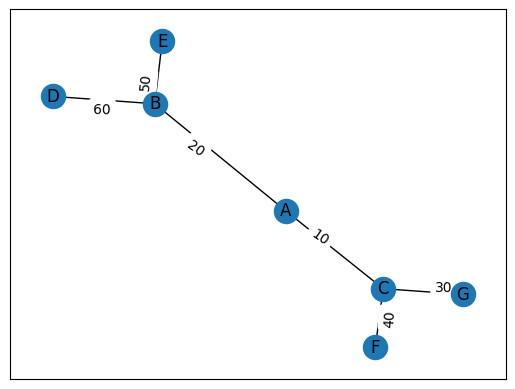

In [3]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}),
                   ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}),
                   ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}),
                   ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}),
                   ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])

G_labels = nx.get_edge_attributes(G, "weight")
DG_labels = nx.get_edge_attributes(DG, "weight")

nx.draw_networkx(G)
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G, seed=0), edge_labels=G_labels)

'''
nx.draw_networkx(DG)
nx.draw_networkx_edge_labels(DG, pos=nx.spring_layout(DG, seed=0), edge_labels=DG_labels)
'''

In [4]:
print(nx.is_connected(G))
print(f"deg(A) = {G.degree['A']}")
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")
print(f"Degree centrality      = {nx.degree_centrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

True
deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2
Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


# **Walks :**

## **Random Walks :**

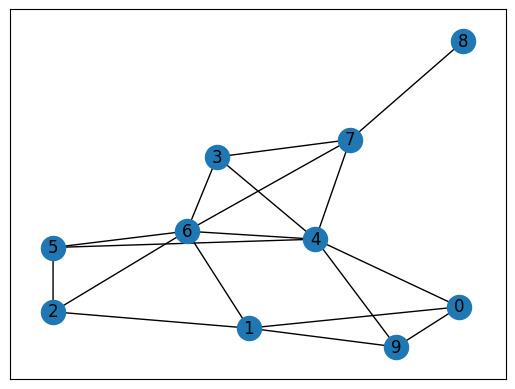

In [5]:
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)
nx.draw_networkx(G)

In [6]:
import numpy as np
import random
random.seed(0)

print(list(G[0]))
print(list(G.neighbors(0)))

def random_walk(start, length):
    walk = [start]  # starting node

    for i in range(length):
        neighbors = list(G[0])
        next_node = random.choice(neighbors)
        walk.append(next_node)
        start = next_node

    return walk

# Create a list of random walks
print(random_walk(0, 10))

[1, 4, 9]
[1, 4, 9]
[0, 4, 4, 1, 4, 9, 4, 4, 4, 4, 4]


{'club': 'Mr. Hi'}
[0, 7, 5, 11, 5, 4, 10, 5, 11, 4, 3]


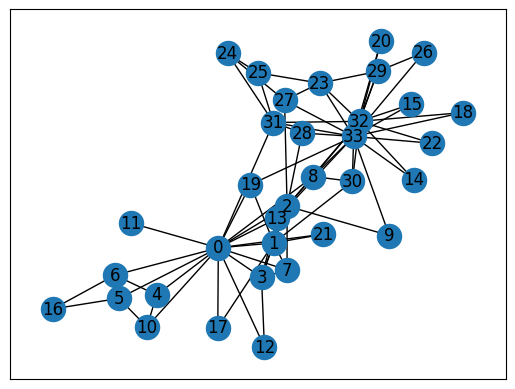

In [7]:
G = nx.karate_club_graph()
print(G.nodes[1])

labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

nx.draw_networkx(G)

walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))


print(walks[0])

## **Biased Random Walk :**

In [8]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

def next_node(previous, current, p, q):
    alphas = []
    neighbors = list(G[current])

    for neighbor in neighbors:
        if neighbor == previous:
            alpha = 1/p
        elif G.has_edge(neighbor, previous):
            alpha = 1
        else:
            alpha = 1/q
        alphas.append(alpha)

    # Normalize the alpha values to create transition probabilities
    probs = [alpha / sum(alphas) for alpha in alphas]

    next = np.random.choice(neighbors, size=1, p=probs)[0]
    return next


def random_walk(start, length, p, q):
    walk = [start]

    for i in range(length):
        current = walk[-1]
        previous = walk[-2] if len(walk) > 1 else None
        next = next_node(previous, current, p, q)
        walk.append(next)

    return walk


random_walk(0, 8, p=1, q=1)

[0, 10, 5, 10, 4, 6, 5, 6, 16]

# **GNNs :**

## **Import the libraries and Load the dataset :**

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_dense_adj, degree, to_networkx
from torch_geometric.nn import GCNConv, GATv2Conv, SAGEConv


torch.manual_seed(0)

In [10]:
# Import dataset from PyTorch Geometric

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

Processing...
Done!


In [11]:
# Print information about the dataset
print(f'Dataset: {dataset}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

degrees = degree(data.edge_index[0]).numpy()    # list of degrees for each node


# Adjacency matrix
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
print('\nAdjacency matrix :\n', adjacency)

Dataset: Cora()
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7

Graph:
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False

Adjacency matrix :
 tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])


In [12]:
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

def leaky_relu(x, alpha=0.2):
    return np.maximum(alpha*x, x)

## **MLP :**

In [13]:
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = nn.Linear(dim_in, dim_h)
        self.linear2 = nn.Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=1e-3)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch} | Train Loss: {loss:.3f} | Train Acc:'
                      f'{acc*100:.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [14]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)
mlp.fit(data, epochs=100)
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%\n')

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)
Epoch 0 | Train Loss: 1.959 | Train Acc:14.29% | Val Loss: 2.00 | Val Acc: 12.40%
Epoch 20 | Train Loss: 0.112 | Train Acc:100.00% | Val Loss: 1.46 | Val Acc: 50.20%
Epoch 40 | Train Loss: 0.016 | Train Acc:100.00% | Val Loss: 1.40 | Val Acc: 53.40%
Epoch 60 | Train Loss: 0.015 | Train Acc:100.00% | Val Loss: 1.34 | Val Acc: 54.40%
Epoch 80 | Train Loss: 0.016 | Train Acc:100.00% | Val Loss: 1.32 | Val Acc: 56.00%
Epoch 100 | Train Loss: 0.015 | Train Acc:100.00% | Val Loss: 1.31 | Val Acc: 56.80%

MLP test accuracy: 55.60%



## **GCN :**

In [15]:
class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [16]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)
acc = gcn.test(data)
print(f'\nGCN test accuracy: {acc*100:.2f}%\n')

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.944 | Train Acc: 12.14% | Val Loss: 1.91 | Val Acc: 31.00%
Epoch  20 | Train Loss: 0.102 | Train Acc: 100.00% | Val Loss: 0.73 | Val Acc: 78.00%
Epoch  40 | Train Loss: 0.015 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 77.40%
Epoch  60 | Train Loss: 0.015 | Train Acc: 100.00% | Val Loss: 0.69 | Val Acc: 77.00%
Epoch  80 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.69 | Val Acc: 77.40%
Epoch 100 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.69 | Val Acc: 77.60%

GCN test accuracy: 81.40%



## **GraphSage :**

In [17]:
class GraphSAGE(torch.nn.Module):
    """GraphSAGE"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.sage1 = SAGEConv(dim_in, dim_h)
        self.sage2 = SAGEConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.sage1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.sage2(h, edge_index)
        return h

    def fit(self, loader, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01)

        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [18]:
graphsage = GraphSAGE(dataset.num_features, 64, dataset.num_classes)
print(graphsage)
graphsage.fit(data, 100)
acc = graphsage.test(data)
print(f'GraphSAGE test accuracy: {acc*100:.2f}%')

GraphSAGE(
  (sage1): SAGEConv(1433, 64, aggr=mean)
  (sage2): SAGEConv(64, 7, aggr=mean)
)
Epoch   0 | Train Loss: 1.948 | Train Acc: 14.29% | Val Loss: 1.95 | Val Acc: 17.00%
Epoch  20 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 1.48 | Val Acc: 70.20%
Epoch  40 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 1.85 | Val Acc: 72.00%
Epoch  60 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 1.91 | Val Acc: 71.00%
Epoch  80 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 1.58 | Val Acc: 74.00%
Epoch 100 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 1.62 | Val Acc: 74.00%
GraphSAGE test accuracy: 78.30%


## **GAT :**

In [19]:
class GAT(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=0.01)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [20]:
# GAT
gat = GAT(dataset.num_features, 32, dataset.num_classes)
print(gat)
gat.fit(data, epochs=100)
acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

GAT(
  (gat1): GATv2Conv(1433, 32, heads=8)
  (gat2): GATv2Conv(256, 7, heads=1)
)
Epoch   0 | Train Loss: 1.971 | Train Acc: 20.00% | Val Loss: 1.96 | Val Acc: 15.60%
Epoch  20 | Train Loss: 0.211 | Train Acc: 99.29% | Val Loss: 0.94 | Val Acc: 70.60%
Epoch  40 | Train Loss: 0.180 | Train Acc: 98.57% | Val Loss: 0.83 | Val Acc: 72.60%
Epoch  60 | Train Loss: 0.171 | Train Acc: 99.29% | Val Loss: 0.93 | Val Acc: 73.00%
Epoch  80 | Train Loss: 0.164 | Train Acc: 99.29% | Val Loss: 0.92 | Val Acc: 73.40%
Epoch 100 | Train Loss: 0.170 | Train Acc: 97.86% | Val Loss: 0.91 | Val Acc: 74.00%
GAT test accuracy: 81.30%
